In [1]:
import pandas as pd
import numpy as np

import random

import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import gc
import utils

plt.style.use('ggplot')
%matplotlib inline

import importlib
utils = importlib.reload(utils)

In [87]:
models = [
    '+-KERAS_4_hey3',
    '+-KERAS_5_hey3',
    
#     '+-XGB_11.5_hey2',
    '+-XGB_11.5_hey3',
    
    '+-XGB_1.5_hey3',
    '+-XGB_hist_last_hey2',
    '+-XGB_hist_last_hey3',
    
#     '+-XGB_5++_hey2',
    '+-XGB_5++_hey3',
    
    'old_XGB_9',
#     '+-XGB_10++_hey3',
#     '+-XGB_15_hey3',
#     '+-XGB_15_hey2',
    'XGB_16_hey2',
    
    
#   'KERAS_2_new2', 
#     'XGB_11', 
#     'XGB_9_new3', 
#     'XGB_2hist_new', 
#     'LGB_1_new', 
#     'XGB_5', 
#     'XGB_9',
    
    
#     'LGB_1_hey3',
# 'dirty_KERAS_3_hey3',
#     'dirty_XGB_9',
#     'dirty_XGB_10_hey3',
#     'dirty_XGB_11.5_hey3',
    
#     'dirty_XGB_5_hey3',
#     'dirty_XGB_hist_last_hey3',
#     'dirty_XGB_1.5_hey3',
         ]#[::-1]
result = utils.merge_models(models, method='mean')
pd.DataFrame(result).to_csv('merged_models.csv', index=False, header=False, sep=';') # 0.5430089


+-KERAS_4_hey3
0.538648315917	0.577349632449	0.538648315917	0.577349632449

+-KERAS_5_hey3
0.53843806856	0.577349632449	0.53822013196	0.577349632449

+-XGB_11.5_hey3
0.537065334861	0.577349632449	0.53713347719	0.577349632449

+-XGB_1.5_hey3
0.537152971163	0.577349632449	0.536881998939	0.577349632449

+-XGB_hist_last_hey2
0.537283606129	0.577349632449	0.536715394792	0.577349632449

+-XGB_hist_last_hey3
0.537191400652	0.577349632449	0.536667985405	0.577349632449

+-XGB_5++_hey3
0.537333747496	0.577349632449	0.536650163969	0.577349632449

old_XGB_9
0.537421764496	0.537645485026	0.536602231085	0.568851017574

XGB_16_hey2
0.537045771061	0.577349632449	0.536593974063	0.56975021024


In [56]:
# loo = pd.read_csv('loo.csv', sep=';', header=None)
# loo.columns=['loo']
# loo['target']=y_train
# loo_loss = loo.apply(lambda x: log_loss([x['target']], [x['loo']], labels=[1, 0]), axis=1)
# pd.DataFrame(loo_loss).to_csv('loo_loss.csv', index=False, header=False, sep=';')

In [57]:
from sklearn.pipeline import Pipeline, FeatureUnion
from utils import SmoothLikelihood,SmoothLikelihood2,SmoothLikelihood3,SmoothLikelihood4, ColumnsFilter

def wrap_classifier(clf, use_columns, mean_columns):
    fs = [("filter", ColumnsFilter(use_columns))]
    
    for i, cc in enumerate(mean_columns):
        fs.append(('mean_'+str(i), SmoothLikelihood4(cc, 0.5,
                                                     kf=StratifiedKFold(random_state=111111+i, n_splits=20, shuffle=True),
                                                     alpha=13,
                                                     seed=10+i,
                                                     std=0.0003)))
    combined_features = FeatureUnion(fs)
    return Pipeline([("features", combined_features), ("model", clf)])

In [15]:
model_name = 'XGB_raw'

train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, light_clean=True)
test = utils.clean_data(test, light_clean=True)

# train = utils.new_features(train)
# test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': 1,
    'random_state': 5555,
    'silent': True,
}
model = xgb.XGBClassifier(**params)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.5378472632515674, 0.53747802321409233, 0.53841321712714674, 0.53748802503075122, 0.53708116769299297, 0.53895782394882996, 0.53880991178416571, 0.53780336914881466, 0.5382301981409312, 0.53837661648625423]
mean: 0.538048561583
std: 0.000579327562488
15 Splits logloss:
[0.53815101382225039, 0.53922203350067144, 0.53844920865836599, 0.53906946631290376, 0.53819479897973088, 0.53854909934156703, 0.53793389583680606, 0.53758419167037519, 0.53917354914342008, 0.53870947058924612, 0.53795858176300926, 0.53838735470477317, 0.53822071172367958, 0.53786733888089655, 0.53858950677443118]
mean: 0.53840401478
std: 0.000474424402404
XGB_raw results saved!


855

In [240]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, more_clean=True)
test = utils.clean_data(test, more_clean=True)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

data = pd.concat((train.drop('cardio', axis=1), test), axis=0)
dic = data.groupby('age_group_orig')['age'].mean().to_dict()
X_train['age_dif'] = X_train[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)
X_test['age_dif'] = X_test[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)

dic2 = data.groupby('age_group_orig')['age'].min().to_dict()
dic3 = data.groupby('age_group_orig')['age'].max().to_dict()
X_train['age_dif2'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif2']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

dic3 = data.groupby('age_group_orig')['age'].std().to_dict()
X_train['age_dif3'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif3']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)


In [59]:
loo_loss = pd.read_csv('loo_loss.csv', sep=';', header=None)
strat = pd.qcut(loo_loss, 20, labels=False).astype(str)
strat = np.hstack((strat, y_train.reshape((-1,1))))
strat =np.apply_along_axis(lambda d: str(d[0]) + '_' + str(d[1]), 1, strat)

In [75]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
# "gluc",
"active_fair",
"smoke_restored",
"alco_restored",
# "active_restored",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
#     "MAP",
#     "MAP_2",
#     "ap_dif",
#     "ap_dif_2"
    'age_dif3',
    'ap_lo_mul_log_ap_hi'
]
mean_columns = [
#     ['gender','age_group','BMI_group', 'ap_hi_group']
]

In [76]:
model_name = 'XGB_1_new3+_old'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': 1,
    'random_state': 2707,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()
# 10 folds logloss:
# [0.53766870782391707, 0.5371781589982656, 0.53764979482730646, 0.53592581451612442, 0.53674140330896469, 0.53876232484002406, 0.53799331229425473, 0.53764991774813253, 0.53766763662006734, 0.53664362431963064]
# mean: 0.53738806953
# std: 0.000755215513669
# 15 Splits logloss:
# [0.53731972628370639, 0.53877173196240546, 0.53778848880405228, 0.53813508655059905, 0.53755323041496528, 0.53772702134196604, 0.53670914507852419, 0.53664368834115916, 0.53790470273384738, 0.53736529400873756, 0.53741512203997088, 0.53732824028088222, 0.53794231541295134, 0.53781718299848336, 0.53799249489853784]
# mean: 0.537627564743
# std: 0.000520435603982
# XGB_1_new results saved!


10 folds logloss:
[0.53750131288480096, 0.53713759997012778, 0.53692745260976216, 0.5362363080496122, 0.53644935001845029, 0.53913323090052401, 0.53787137923655959, 0.53729285019678263, 0.53796949039395658, 0.53682282424380801]
mean: 0.53733417985
std: 0.000800764042407
15 Splits logloss:
[0.53744731348203056, 0.53873939104981361, 0.53799895407685216, 0.53796877370703788, 0.53754031070676589, 0.53801446693780874, 0.5370904318367441, 0.53684984713633144, 0.5377869659818354, 0.53769507362462932, 0.5374991501915668, 0.5374843948263498, 0.53782809230649753, 0.53766981512210554, 0.5378467077291792]
mean: 0.537697312581
std: 0.000420924982787
XGB_1_new3+_old results saved!


252

In [107]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, more_clean=True)
test = utils.clean_data(test, more_clean=True)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

data = pd.concat((train.drop('cardio', axis=1), test), axis=0)
dic = data.groupby('age_group_orig')['age'].mean().to_dict()
X_train['age_dif'] = X_train[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)
X_test['age_dif'] = X_test[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)

dic2 = data.groupby('age_group_orig')['age'].min().to_dict()
dic3 = data.groupby('age_group_orig')['age'].max().to_dict()
X_train['age_dif2'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif2']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

dic3 = data.groupby('age_group_orig')['age'].std().to_dict()
X_train['age_dif3'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif3']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
# "gluc",
"active_fair",
"smoke_restored",
"alco_restored",
# "active_restored",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
#     "MAP",
#     "MAP_2",
#     "ap_dif",
#     "ap_dif_2"
    'age_dif2',
    'ap_lo_mul_log_ap_hi'
]
mean_columns = [
]
model_name = 'XGB_1.5'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53725171692479057, 0.53703045196538568, 0.53740991363743607, 0.53635056676751725, 0.53646935917119232, 0.53923587514390248, 0.53791284870431799, 0.53730533773678013, 0.53777624650636491, 0.53710986963515228]
mean: 0.537385218619
std: 0.000774081314448
15 Splits logloss:
[0.53742092951103337, 0.5384773584224638, 0.5379778652693189, 0.5378588299444389, 0.53784171270561365, 0.53806677264312197, 0.53681670481321353, 0.53671440505325085, 0.53763344823294101, 0.53762152334480062, 0.53730205916764129, 0.53755454292964366, 0.53762875640951102, 0.53763098502762263, 0.53802579804953365]
mean: 0.537638112768
std: 0.000442677459261
XGB_1.5 results saved!


484

In [108]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, more_clean=True)
test = utils.clean_data(test, more_clean=True)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

data = pd.concat((train.drop('cardio', axis=1), test), axis=0)
dic = data.groupby('age_group_orig')['age'].mean().to_dict()
X_train['age_dif'] = X_train[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)
X_test['age_dif'] = X_test[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)

dic2 = data.groupby('age_group_orig')['age'].min().to_dict()
dic3 = data.groupby('age_group_orig')['age'].max().to_dict()
X_train['age_dif2'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif2']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

dic3 = data.groupby('age_group_orig')['age'].std().to_dict()
X_train['age_dif3'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif3']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
# "gluc",
"active_fair",
"smoke_restored",
"alco_restored",
# "active_restored",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
#     "MAP",
#     "MAP_2",
#     "ap_dif",
#     "ap_dif_2"
    'age_dif2',
    'ap_lo_mul_log_ap_hi'
]
mean_columns = [
]
model_name = 'XGB_hist_last'
params = {
     'colsample_bytree': 0.95,
     'gamma': 0.55,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 3,
     'n_estimators': 392,
     'reg_alpha': 0,
     'reg_lambda': 0.4,
     'subsample': 0.85,
    
    'scale_pos_weight': 1.0008,

    'tree_method': 'hist',
    'grow_policy': 'lossguide',
    
    'n_jobs': 4,
    'random_state': 2222,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.5377255643759602, 0.53774712261244095, 0.53750728266173176, 0.53653315322997963, 0.53670645891882773, 0.53895424140962633, 0.53797635579500447, 0.53697059548217363, 0.53758899284074169, 0.53662340540680564]
mean: 0.537433317273
std: 0.000709251439562
15 Splits logloss:
[0.53735750489123169, 0.53873443021075351, 0.53783059323570204, 0.53836135060375645, 0.53774369301700164, 0.5383749575932909, 0.5373293814401896, 0.53716465325378593, 0.53795659512290284, 0.53789707688703425, 0.53757050095622738, 0.53790552468593456, 0.53765635917832455, 0.53783364839412806, 0.53840114216187174]
mean: 0.537874494109
std: 0.00042751636645
XGB_hist_last results saved!


477

In [77]:
model_name = 'XGB_2hist_new3_old'
params = {
     'colsample_bytree': 0.95,
     'gamma': 0.55,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 3,
     'n_estimators': 392,
     'reg_alpha': 0,
     'reg_lambda': 0.4,
     'subsample': 0.85,
    
    'scale_pos_weight': 1.0008,

    'tree_method': 'hist',
    'grow_policy': 'lossguide',
    
    'n_jobs': 4,
    'random_state': 2222,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53752918503812497, 0.53771013377439458, 0.53743317190665674, 0.53627761753352221, 0.5367697040230861, 0.53941777020943626, 0.53824072267523182, 0.53750271714089204, 0.53756483352847506, 0.53660243215593273]
mean: 0.537504828799
std: 0.000843394531683
15 Splits logloss:
[0.53756109815170727, 0.53899436944909396, 0.53767830883108436, 0.5383188730634394, 0.5377561352589123, 0.53849550592446971, 0.53751673266584321, 0.53708147742652468, 0.53797848637419798, 0.53774807256344881, 0.53743283887562299, 0.5377944021357135, 0.53776152524582688, 0.5377262755505563, 0.53828240057089849]
mean: 0.537875100139
std: 0.000460015656871
XGB_2hist_new3_old results saved!


144

In [334]:
model_name = 'XGB_3hist_new3'
clf = xgb.XGBClassifier(
        learning_rate=0.07,
        n_estimators=218,
        max_depth=3,
        min_child_weight=5,
        gamma=0.2,
        subsample=0.6,
        colsample_bytree=0.55,
        scale_pos_weight = 1.0008,
        reg_alpha=0,
        reg_lambda=1.0,
        nthread=4,
        tree_method='hist',
        grow_policy='lossguide',
       
        seed=3333
    )
model = wrap_classifier(clf, use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.5379839260936361, 0.53816991645897572, 0.53886899239771646, 0.53865609559660665, 0.53730318840624858, 0.53878073336459931, 0.53863054027810808, 0.5385249681345301, 0.53766243187239116, 0.537128039979896]
mean: 0.538170883258
std: 0.000597097847837
15 Splits logloss:
[0.53795001058271597, 0.5392092121258556, 0.5386003337025288, 0.53889346439985653, 0.53860611505611311, 0.53904637533466193, 0.53731639419735544, 0.53795841775258024, 0.53841882641489303, 0.53888161631203479, 0.53844108030989413, 0.5384103103387835, 0.53858657880677352, 0.53859749780196164, 0.53885239895393278]
mean: 0.538517908806
std: 0.000467224678451
XGB_3hist_new3 results saved!


131

In [335]:
model_name = 'XGB_4_new3'
clf = xgb.XGBClassifier(
        learning_rate=0.06,
        n_estimators=114,
        max_depth=5,
        min_child_weight=5,
        gamma=0.3,
        subsample=0.5,
        colsample_bytree=0.5,
        scale_pos_weight= 1.0008,
        reg_alpha=9,
        reg_lambda=1.4,
        nthread=4,
       
        seed=4444
    )
model = wrap_classifier(clf, use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.5372798150713648, 0.53791613680921491, 0.53878298548572712, 0.53740363760690257, 0.53742230238740807, 0.54009260483848953, 0.53902598312018546, 0.53827365839925478, 0.53918454494667822, 0.53778618566725256]
mean: 0.538316785433
std: 0.000882043465903
15 Splits logloss:
[0.5385158032203714, 0.53965200841852601, 0.53898625000495282, 0.53915778646511692, 0.53903990193119367, 0.53919933438975187, 0.53801006926365547, 0.53778684493846129, 0.53944816148795538, 0.53857984661896319, 0.53880384634470657, 0.53907984357203043, 0.53910818172051078, 0.5386576459349266, 0.53882459175409303]
mean: 0.538856674404
std: 0.000479684246312
XGB_4_new3 results saved!


131

In [336]:
model_name = 'LGB_1_new3_tune'
params = {
#      'colsample_bytree': 0.95,
#      'learning_rate': 0.02,
# #      'max_depth': 5,
#      'num_leaves': 2**5,
#      'min_child_weight': 3,
#      'n_estimators': 392,
#      'reg_alpha': 0,
#      'reg_lambda': 0.4,
#      'subsample': 0.85,
    
    'colsample_bytree': 0.7,
     'learning_rate': 0.01,
     'min_child_weight': 4,
     'n_estimators': 666,
     'num_leaves': 32,
     'reg_alpha': 0.7,
     'reg_lambda': 1.0,
     'subsample': 0.9,
       
    'nthread': 4,
    'seed': 8718,
    'silent': True,
}
model = wrap_classifier(lgb.LGBMClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()
# 10 folds logloss:
# [0.53756951880849935, 0.53756800724003773, 0.5375367074152424, 0.53667179732395554, 0.53790595650371276, 0.53995326865567195, 0.53776055503473275, 0.53817163663410283, 0.5381433787139519, 0.53729475130299043]
# mean: 0.537857557763
# std: 0.00081096393797
# 15 Splits logloss:
# [0.53777775802076933, 0.53909393579002873, 0.53812802380755431, 0.53857237243158707, 0.53861053963006966, 0.53894361521882461, 0.53728773175532807, 0.53734315369059982, 0.53892452237168864, 0.53861012055403457, 0.5379406233488, 0.53866406805203471, 0.5375163305701085, 0.53860889982927862, 0.53884103667440475]
# mean: 0.538324182116
# std: 0.000588736305597
# LGB_1_new2 results saved!


10 folds logloss:
[0.53766162527506844, 0.5374266211896388, 0.53760433472770086, 0.53679771501063867, 0.5377245804774452, 0.5396207529399587, 0.53769069542552494, 0.53749277135592888, 0.53820215592291776, 0.53703564856462271]
mean: 0.537725690089
std: 0.000729337272871
15 Splits logloss:
[0.53726950392304573, 0.53852603020609235, 0.53809606322733139, 0.53821580557923643, 0.53813003243644097, 0.53841680963607053, 0.53717042930989378, 0.5370071622879341, 0.53834842485905787, 0.53802579070685108, 0.5374945636682712, 0.53832524766880996, 0.53750273054303366, 0.53829204185824431, 0.53813633742917555]
mean: 0.537930464889
std: 0.000482536955547
LGB_1_new3_tune results saved!


121

In [337]:
model_name = 'LGB_2_new3'
clf = lgb.LGBMClassifier(
        learning_rate=0.07,
        n_estimators=218,
#         max_depth=3,
        num_leaves=2**3,
        min_child_weight=5,
        subsample=0.6,
        colsample_bytree=0.55,
        reg_alpha=0,
        reg_lambda=1.0,
        nthread=4,
       
        seed=2222
    )
model = wrap_classifier(clf, use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53937448052429759, 0.53789268906902687, 0.53906739933388059, 0.53740036596822283, 0.53728356734675697, 0.53962659013306369, 0.53918396753973052, 0.53915447949178408, 0.53801015771793192, 0.53811470183369781]
mean: 0.538510839896
std: 0.000818350389221
15 Splits logloss:
[0.53803063458405298, 0.53946865629727103, 0.53905003198906909, 0.53958786691393146, 0.5383686195084747, 0.53854395783705289, 0.5375007882645837, 0.53728663209166538, 0.53948690915568331, 0.53849765939493699, 0.53805036093615666, 0.53869701556032668, 0.53808207011012754, 0.53862911219636678, 0.53856756395148686]
mean: 0.538523191919
std: 0.000660165901726
LGB_2_new3 results saved!


121

In [65]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
"height_div_ap_lo",
"active_fair",
"smoke_restored",
"alco_restored",
"height_mul_log_cholesterol",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
"ap_hi_mul_weight",
]

In [109]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
"height_div_ap_lo",
"active_fair",
"smoke_restored",
"alco_restored",
"height_mul_log_cholesterol",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
"ap_hi_mul_weight",
]

model_name = 'XGB_5++'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': 1,
    'random_state': 5555,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53748143531328363, 0.53643027602419124, 0.53742079411985921, 0.53646969508597375, 0.53709606288838829, 0.53858200576875703, 0.53867348178877827, 0.53796212216933004, 0.53695603374630108, 0.53773683103579895]
mean: 0.537480873794
std: 0.000740628382404
15 Splits logloss:
[0.53763028493878384, 0.53904652456247382, 0.53824763105596818, 0.53831284453382799, 0.53776232773721933, 0.538300771923647, 0.53742641560023741, 0.53692848577563257, 0.53873849186230272, 0.5378510660564616, 0.53781144047014062, 0.53818610331345174, 0.53813084953278301, 0.53777048381293813, 0.53798492299623435]
mean: 0.538008576278
std: 0.000498120024211
XGB_5++ results saved!


246

In [ ]:
model_name = 'XGB_6hist'
params = {
     'colsample_bytree': 0.95,
     'gamma': 0.55,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 3,
     'n_estimators': 392,
     'reg_alpha': 0,
     'reg_lambda': 0.4,
     'subsample': 0.85,
    'scale_pos_weight': 1.0008,

    'tree_method': 'hist',
    'grow_policy': 'lossguide',
    
    'n_jobs': 4,
    'random_state': 6666,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()

In [ ]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
"gluc",
# "active_fair",
"smoke_restored",
"alco_restored",
"active_restored",
# "height_mul_log_gluc",
"BMI",
"age_group",
# "cholesterol_div_log_age_group",
"MAP",
"ap_dif",
# "gluc_mul_log_age",
# "age_group_mul_log_ap_lo",
]
model_name = 'XGB_7'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': 1,
    'random_state': 5555,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()

In [74]:
use_columns = [
'gender',
'height',
'weight',
'ap_hi',
'ap_lo',
'cholesterol',
'active_fair',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'ap_hi_mul_weight',
'age_dif3',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
]
mean_columns = [
    ['cholesterol','gluc','smoke_restored','active_restored'],
    ['ap_hi_group', 'age_group', 'gender'],
    ['gender','cholesterol','age_group']
]
model_name = 'XGB_9_new4'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': 1,
    'random_state': 5555,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.5375199075357896, 0.53742246368730795, 0.53815697144962982, 0.53712174900738607, 0.53673513623663738, 0.53854060134478732, 0.53810493765564882, 0.53861170231499911, 0.53698003016238471, 0.53754356557337934]
mean: 0.537673706497
std: 0.000618168257791
15 Splits logloss:
[0.53782544576287983, 0.53842227746901061, 0.53855977525118559, 0.53785606153628651, 0.5380767511106318, 0.53779653677645889, 0.53685753050340068, 0.5371165637393438, 0.53804963710425158, 0.5377550234826548, 0.53772260130179073, 0.53852186123423629, 0.53823715836235453, 0.53749799780813712, 0.53739920457736368]
mean: 0.537846295068
std: 0.000476265479788
XGB_9_new4 results saved!


1858

In [105]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
"gluc",
"active_fair",
"alco_fair",
"smoke_restored",
# "alco_restored",
# "active_restored",
"height_mul_log_gluc",
"BMI",
"BMI_3",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
    'ap_dif_2',
    'age_group_MAPX',
    'age_div_age_group',
    'age_mul_log_gluc',
    
]
mean_columns = [
]
model_name = 'XGB_11'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': 1,
    'random_state': 5555,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53705926157367145, 0.53733601508812645, 0.53771855842081184, 0.5359792280899891, 0.53693924322503861, 0.53910665670962343, 0.53844442583227448, 0.53835128015583744, 0.53727878964108855, 0.53706811199974902]
mean: 0.537528157074
std: 0.000855663570376
15 Splits logloss:
[0.5374962021978128, 0.53905195793775573, 0.53788655844703315, 0.53814469379381769, 0.53772475847867984, 0.53791006451800816, 0.53716173448431348, 0.53691985893196292, 0.53803780233948717, 0.53809312138138787, 0.53754340288770341, 0.53796857260025688, 0.53804213684318325, 0.53758148050441279, 0.5383782163168348]
mean: 0.537862704111
std: 0.000490188504908
XGB_11 results saved!


102706

In [106]:
use_columns = [
"gender",
"ap_hi",
"ap_lo",
"cholesterol",
"active_fair",
"smoke_restored",
"alco_restored",
"height_mul_log_cholesterol",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
"ap_hi_mul_weight",
"age_dif2",
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP'
]
mean_columns = [
]
model_name = 'XGB_11.5'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53686851148322801, 0.53736059390912017, 0.53666355794113441, 0.535523743942797, 0.53679547952480966, 0.53861438218114643, 0.53807611087530838, 0.53737704840718981, 0.53686235439963093, 0.53729155506246207]
mean: 0.537143333773
std: 0.000792879936275
15 Splits logloss:
[0.53721414658444977, 0.53828780524290742, 0.53791618690568777, 0.5378767855951474, 0.53770635365127095, 0.53777360172702793, 0.53670966181815383, 0.53666229957945288, 0.53801483837745734, 0.53721716647754825, 0.53710686488094783, 0.53780748392801203, 0.5380721361332883, 0.53753834982393756, 0.53747122941095204]
mean: 0.537558327342
std: 0.000471459177706
XGB_11.5 results saved!


138

In [73]:
use_columns = [
"gender",
"ap_hi",
"ap_lo",
"cholesterol",
"active_fair",
"smoke_restored",
"alco_restored",
"height_mul_log_cholesterol",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
"ap_hi_mul_weight",
"age_dif3",
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP'
]
mean_columns = [
]
model_name = 'XGB_12+_old'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()
# 10 folds logloss:
# [0.53704480494584961, 0.5372338084318321, 0.53666556223026052, 0.53560185789485049, 0.53668222226417972, 0.53879478440702466, 0.53826178888837006, 0.53774793787695341, 0.53692344798695879, 0.53730431576900928]
# mean: 0.53722605307
# std: 0.000847617145485
# 15 Splits logloss:
# [0.53748063463983786, 0.53847890092734074, 0.53779154165710008, 0.53788957848328922, 0.53763211692816448, 0.53796624050271658, 0.53669527297076725, 0.53675309823542128, 0.53803605526481713, 0.53719790570579828, 0.53729484028156316, 0.53785677749805505, 0.53822696436675532, 0.5376624883088682, 0.53757445277699401]
# mean: 0.537635791236
# std: 0.000480798208739
# XGB_12 results saved!


10 folds logloss:
[0.53703764825081513, 0.53728243356857874, 0.53658499381738178, 0.53567110797773665, 0.53665642296697813, 0.53898089386915016, 0.53810381263854279, 0.53787654406867935, 0.53696571873184384, 0.53721824084169767]
mean: 0.537237781673
std: 0.000867841622833
15 Splits logloss:
[0.53747176780125927, 0.53844322914718867, 0.53786926190679274, 0.53783675681338428, 0.53765487216005015, 0.53785567264631395, 0.53662773037772804, 0.53676560614612845, 0.5380229115502998, 0.53727193171726095, 0.53723850716969801, 0.53783158944032727, 0.53801995540836023, 0.5375331717926477, 0.53752866247491471]
mean: 0.537598108437
std: 0.00046350786198
XGB_12+_old results saved!


1227

In [110]:
def wrap_classifier(clf, use_columns, mean_columns):
    fs = [("filter", ColumnsFilter(use_columns))]
    
    for i, cc in enumerate(mean_columns):
        fs.append(('mean_'+str(i), SmoothLikelihood4(cc, 0.5,
                                                     kf=StratifiedKFold(random_state=111111+i, n_splits=10, shuffle=True),
                                                     alpha=13,
                                                     seed=10+i,
                                                     std=0.0005
                                                   )))
    combined_features = FeatureUnion(fs)
    return Pipeline([("features", combined_features), ("model", clf)])

use_columns = [
'gender',
'height',
'weight',
'ap_hi',
'ap_lo',
'cholesterol',
'active_fair',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'ap_hi_mul_weight',
'age_dif',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
]
mean_columns = [
#     ['age_group', 'gender', "smoke_restored", 'cholesterol'],
#     ['gender','cholesterol','age_group', 'gluc']
#      ['cholesterol','gluc','smoke_restored','active_restored'],
#     ['error_group']
]
model_name = 'XGB_10++'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53689676289051369, 0.5373603015080054, 0.53651280845065108, 0.53580115127403327, 0.53698532860471715, 0.53843325714086909, 0.53815985595697202, 0.53761159622460619, 0.53717990453337727, 0.53741799298400994]
mean: 0.537235895957
std: 0.000723839814262
15 Splits logloss:
[0.53765993032178705, 0.53867581527591457, 0.53769699181314734, 0.53811484735192994, 0.53771280984580516, 0.53810871900635815, 0.5365306499710395, 0.53663949914720088, 0.53835074137177852, 0.53730052253036276, 0.53717302257106414, 0.53771521159296942, 0.53790379666306432, 0.53741230197605627, 0.53741681287526377]
mean: 0.537627444821
std: 0.000564015533409
XGB_10++ results saved!


174

In [357]:
use_columns = [
"gender",
"ap_hi",
"ap_lo",
"cholesterol",
"active_fair",
"smoke_restored",
"alco_restored",
"height_mul_log_cholesterol",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
"ap_hi_mul_weight",
"age_dif2",
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP'
]
mean_columns = []
model_name = 'LGB_3_tune'
params = {
#      'colsample_bytree': 0.95,
#      'learning_rate': 0.02,
# #      'max_depth': 5,
#      'num_leaves': 2**5,
#      'min_child_weight': 3,
#      'n_estimators': 392,
#      'reg_alpha': 0,
#      'reg_lambda': 0.4,
#      'subsample': 0.85,
       
    
     'colsample_bytree': 0.7,
     'learning_rate': 0.01,
     'min_child_weight': 4,
     'n_estimators': 666,
     'num_leaves': 32,
     'reg_alpha': 0.7,
     'reg_lambda': 1.0,
     'subsample': 0.9,
    
    'nthread': 4,
    'seed': 8718,
    'silent': True,
}
model = wrap_classifier(lgb.LGBMClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()

# 10 folds logloss:
# [0.53767506255190567, 0.53809131998863458, 0.53705116839877232, 0.53668511250864248, 0.53780387415964981, 0.53937728575863197, 0.53802692178087597, 0.53878659743409962, 0.5378564032952784, 0.53801272696113245]
# mean: 0.537936647284
# std: 0.000726541274968
# 15 Splits logloss:
# [0.53834147974540969, 0.5394410573371462, 0.53825726316988864, 0.53910260867342974, 0.53838732842454362, 0.53884364616057856, 0.53736301243477702, 0.53719629680395486, 0.53891467477714317, 0.53867112698302755, 0.53795086767555544, 0.53864809716710793, 0.53791704086269121, 0.53856845854028557, 0.53831656058198663]
# mean: 0.538394634623
# std: 0.000588348818365
# LGB_3 results saved!


10 folds logloss:
[0.53717071349460888, 0.53781977771039857, 0.53718341565434069, 0.5362325533184753, 0.53761457239380372, 0.53943760238693372, 0.53809728697896497, 0.53792784953322836, 0.53774809218412511, 0.53802701355899052]
mean: 0.537725887721
std: 0.000778049569319
15 Splits logloss:
[0.53750011474224668, 0.5387928127374092, 0.53841178620585617, 0.53839941361433985, 0.53818401564291829, 0.53850119628060311, 0.53684946486724305, 0.53711684760130685, 0.53880187865099616, 0.53789051095468854, 0.53755467908666077, 0.53840788852034527, 0.53769138788159454, 0.53804958338962072, 0.53790436974214506]
mean: 0.538003729995
std: 0.000561106200884
LGB_3_tune results saved!


121

In [70]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, more_clean=True)
test = utils.clean_data(test, more_clean=True)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

data = pd.concat((train.drop('cardio', axis=1), test), axis=0)
dic = data.groupby('age_group_orig')['age'].mean().to_dict()
X_train['age_dif'] = X_train[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)
X_test['age_dif'] = X_test[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)

dic2 = data.groupby('age_group_orig')['age'].min().to_dict()
dic3 = data.groupby('age_group_orig')['age'].max().to_dict()
X_train['age_dif2'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif2']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

dic3 = data.groupby('age_group_orig')['age'].std().to_dict()
X_train['age_dif3'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif3']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

use_columns = [
'gender',
'ap_hi',
'ap_lo',
'cholesterol',
'active_fair',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'age_dif3',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
'cholesterol_div_ap_hi',
'ap_hi_div_age_group',
'ap_hi_mul_log_gluc',
]
mean_columns = [
]
model_name = 'XGB_13+'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()
# mean: 0.53724318025
# std: 0.000823813654475


10 folds logloss:
[0.53633377926139214, 0.53787968244735507, 0.53678698753040133, 0.53574880117472723, 0.53659326405119134, 0.53837762949958046, 0.5383372151590321, 0.53763670109409178, 0.53783856781698025, 0.53665921990190246]
mean: 0.537219184794
std: 0.000861643850406
15 Splits logloss:
[0.53780314634421045, 0.53846443003487021, 0.53772967143658368, 0.53787954415026162, 0.53758834946581291, 0.53773027824796737, 0.53676478545279016, 0.53672457703486798, 0.53750557539044397, 0.53757897697531043, 0.53723004711907174, 0.53797078621263306, 0.5377571257504502, 0.53752696144057521, 0.5373704653084278]
mean: 0.537574981358
std: 0.000425953835108
XGB_13+ results saved!


498

In [94]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, more_clean=True)
test = utils.clean_data(test, more_clean=True)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

data = pd.concat((train.drop('cardio', axis=1), test), axis=0)
dic = data.groupby('age_group_orig')['age'].mean().to_dict()
X_train['age_dif'] = X_train[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)
X_test['age_dif'] = X_test[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)

dic2 = data.groupby('age_group_orig')['age'].min().to_dict()
dic3 = data.groupby('age_group_orig')['age'].max().to_dict()
X_train['age_dif2'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif2']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

dic3 = data.groupby('age_group_orig')['age'].std().to_dict()
X_train['age_dif3'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif3']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

use_columns = [
'gender',
'ap_hi',
'ap_lo',
#     'height',
#     'weight',
'cholesterol',
'active_fair',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'age_dif2',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
'cholesterol_div_ap_hi',
'ap_hi_mul_log_gluc',
'height_mul_log_ap_hi',
'cholesterol_div_log_ap_hi',
'BMI_div_ap_hi',
'BMI_div_log_age',
]
mean_columns = [
]
model_name = 'XGB_14'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53613238175423117, 0.53822580752422255, 0.53720747413722825, 0.5357198606677418, 0.53642831559431747, 0.53827644350689441, 0.53780801100163278, 0.53746051986199372, 0.5379430288167848, 0.53735667860989234]
mean: 0.537255852147
std: 0.000843811525683
15 Splits logloss:
[0.5376782818182948, 0.53854286922869232, 0.53788559294279137, 0.53797279842286594, 0.53777877430564591, 0.53790015493235777, 0.53680516431835434, 0.53673019508804598, 0.53780422866025146, 0.53732592869798346, 0.53717839394509792, 0.53811736569872926, 0.53758615118158715, 0.53741532325815589, 0.53727807225003132]
mean: 0.537599952983
std: 0.000470901836041
XGB_14 results saved!


76155

In [104]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = utils.clean_data(train, more_clean=True)
test = utils.clean_data(test, more_clean=True)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

data = pd.concat((train.drop('cardio', axis=1), test), axis=0)
dic = data.groupby('age_group_orig')['age'].mean().to_dict()
X_train['age_dif'] = X_train[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)
X_test['age_dif'] = X_test[['age_group_orig', 'age']].apply(lambda x: x['age'] - dic[x['age_group_orig']], axis=1)

dic2 = data.groupby('age_group_orig')['age'].min().to_dict()
dic3 = data.groupby('age_group_orig')['age'].max().to_dict()
X_train['age_dif2'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif2']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

dic3 = data.groupby('age_group_orig')['age'].std().to_dict()
X_train['age_dif3'] = X_train[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)
X_test['age_dif3']  =  X_test[['age_group_orig', 'age']].apply(lambda x: (x['age'] - dic2[x['age_group_orig']]) / dic3[x['age_group_orig']], axis=1)

use_columns = [
'gender',
'ap_hi',
'ap_lo',
'cholesterol',
'active_fair',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'age_dif2',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
'cholesterol_div_ap_hi',
'ap_hi_mul_log_gluc',
'BMI_div_ap_hi',
'BMI_div_log_age',
'gluc',
'gluc_mul_height',
]
mean_columns = [
]
model_name = 'XGB_15'
params = {
     'colsample_bytree': 0.875,
     'gamma': 0.05,
     'learning_rate': 0.02,
     'max_depth': 5,
     'min_child_weight': 5,
     'n_estimators': 369,
    'scale_pos_weight': 1.0008,

     'reg_alpha': 0,
     'reg_lambda': 10,
     'subsample': 0.7,
    
    'n_jobs': -1,
    'random_state': 1223,
    'silent': True,
}
model = wrap_classifier(xgb.XGBClassifier(**params), use_columns, mean_columns)
utils.execute_model(model,
              X_train,
              y_train,
              X_test,
              model_name=model_name,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
             )
gc.collect()


10 folds logloss:
[0.53632533296485074, 0.53799212797046569, 0.53704150208014989, 0.53580128637431024, 0.53661442062561437, 0.53812744425965353, 0.53797789753615344, 0.53781722837361345, 0.53787488566372954, 0.53721425549077961]
mean: 0.537278638134
std: 0.000771817100012
15 Splits logloss:
[0.53768047423909104, 0.53861208052542953, 0.53789466896866045, 0.53776118257632921, 0.53759145164507482, 0.53770940208142359, 0.53686826435316881, 0.53682856503749887, 0.53769481290255983, 0.5375081090941316, 0.53703511075116694, 0.53790896761106943, 0.53762354616732111, 0.53748105609346009, 0.53746767402227436]
mean: 0.537577691071
std: 0.000427623257325
XGB_15 results saved!


63308

In [ ]:
# 10 folds logloss:
# [0.53738498425183678, 0.53677908088457116, 0.53770915332159341, 0.53642631845512079, 0.53676456015622709, 0.53878675389632313, 0.53836206743417025, 0.53744774297941589, 0.53755816713189852, 0.537097236617332]
# mean: 0.537431606513
# std: 0.000692157037285
# 15 Splits logloss:
# [0.53763639168405819, 0.53886063596233724, 0.53784681931617007, 0.53773258502195986, 0.53745225650551065, 0.53805173773726533, 0.53725377004735531, 0.53679796278192882, 0.53810787266315452, 0.53753800572366228, 0.53773746853348403, 0.53755873253622222, 0.53793157278471404, 0.53761289643780108, 0.53821744652580294]
# mean: 0.537755743617
# std: 0.000452249518864
# XGB_1 results saved!

# KERAS models

In [83]:
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adamax
import pandas as pd


class KerasModel(object):
    def __init__(self,
                 var_num,
                 epochs=70,
                 learn_rate=0.1,
                 config=None,
                 batch_size=512,
                 verbose=0,
                 validation_split=0.2,
                 loss="binary_crossentropy"):

        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.validation_split = validation_split
        
        self.model = Sequential()
        model = self.model
        
        if config is None:
            config =[(var_num, 0.0)]
        else:
            config = config.copy()
            
        n, dp = config.pop(0)

        model.add(Dense(n, input_dim=var_num, kernel_initializer='uniform'))
        model.add(LeakyReLU())
        if 0 < dp < 1:
            model.add(Dropout(dp))
        
        while config:
            n, dp = config.pop(0)
            model.add(Dense(n, kernel_initializer='uniform'))
            model.add(LeakyReLU())
            if 0 < dp < 1:
                model.add(Dropout(dp))


        model.add(Dense(1, activation='sigmoid'))
        opt = Adamax(lr=learn_rate)

        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])


    def fit(self, X, y, sample_weight=None, callbacks=[]):
        process_X = X.values if hasattr(X, 'iloc') else X
        process_y = y
        return self.model.fit(process_X, process_y, batch_size=self.batch_size,
                       epochs=self.epochs, verbose=self.verbose,
                       sample_weight=sample_weight,
                       callbacks=callbacks,
                       validation_split=self.validation_split,
                       shuffle=True)

    def predict_proba(self, X):
        process_x = X.values if hasattr(X, 'iloc') else X
        result  = self.model.predict(process_x)
        classone_probs = result
        classzero_probs = 1.0 - classone_probs
        return np.hstack((classzero_probs, classone_probs))
#         return result
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

Using Theano backend.


In [ ]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
# "gluc",
# "active_fair",
"smoke_restored",
"alco_restored",
"active_restored",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
]

X1 = X_train[use_columns]
X2 = X_test[use_columns]

X = pd.concat((X1,X2), axis=0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler().fit(X)
X1 = pd.DataFrame(scaler.transform(X1)) #.values
X2 = pd.DataFrame(scaler.transform(X2)) #.values

In [ ]:
{'batch_size': 512, 'choice': {'dropout2': 0.2, 'layers': 'two', 'units2': 64}, 
 'dropout1': 0.2, 'epochs': 100, 'learning_rate': 0.01, 'units1': 64}

def create(x1, x2):
    config = [(64,0.2), (64,0.2)]
    return KerasModel(var_num=len(use_columns),
                   epochs=200,
                   learn_rate=0.001,
                   config=config,
                   batch_size=1024,
                   verbose=0,
                   validation_split=0.0)
utils.execute_model(None,
              X1,
              y_train,
              X2,
              model_name="KERAS_1",
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              create_callback=create
             )

In [226]:
use_columns = [
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
# "gluc",
# "active_fair",
"smoke_restored",
"alco_restored",
"active_restored",
"height_mul_log_gluc",
"BMI",
"age_group",
"cholesterol_div_log_gluc",
"gluc_mul_log_age",
    "age_dif2",
    'ap_lo_mul_log_ap_hi'
]

X1 = X_train[use_columns]
X2 = X_test[use_columns]

X = pd.concat((X1,X2), axis=0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X1 = pd.DataFrame(scaler.transform(X1)) #.values
X2 = pd.DataFrame(scaler.transform(X2)) #.values

In [227]:
def create(x1, x2):
    config = [(64,0.075), (64,0.025)]
    return KerasModel(var_num=len(use_columns),
                   epochs=200,
                   learn_rate=0.001,
                   config=config,
                   batch_size=1024,
                   verbose=0,
                   validation_split=0.0)
utils.execute_model(None,
              X1,
              y_train,
              X2,
              model_name="KERAS_2_new3",
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              create_callback=create
             )
# 10 folds logloss:
# [0.53941655247960096, 0.53948285905635651, 0.5410106729314389, 0.53912962744409887, 0.53698305462716001, 0.5403335904846005, 0.54010221090437982, 0.53951386144785773, 0.54022708162887678, 0.54065412124808676]
# mean: 0.539685363225
# std: 0.00106472303221
# 15 Splits logloss:
# [0.54007965267547187, 0.54125255258470062, 0.54130464466328598, 0.53925078093961232, 0.54033351755230907, 0.54033504540224875, 0.53899051997952518, 0.54045933061341445, 0.54048469060233661, 0.54023878135549885, 0.54058610645051863, 0.53928027534440515, 0.54102960345102469, 0.53928483830747154, 0.54022886490688793]
# mean: 0.540209280322
# std: 0.000702974350206
# KERAS_2_new results saved!


10 folds logloss:
[0.53961217451423693, 0.5396808500533844, 0.54098757615145787, 0.53858475865190225, 0.53710015882674345, 0.54061671917671528, 0.54011548094768613, 0.53939815352736598, 0.53968578716174487, 0.5409222082789733]
mean: 0.539670386729
std: 0.0011071677902
15 Splits logloss:
[0.54038642253181235, 0.54082915234539131, 0.54128979139588773, 0.539145411098642, 0.54047921122654918, 0.54041440063537582, 0.53898771071664631, 0.54093668633344627, 0.54029028490833231, 0.5399927537461654, 0.54040002405590248, 0.53961013640037603, 0.54110704980713009, 0.53933378012371913, 0.53993272956114791]
mean: 0.540209036326
std: 0.00068063713403
KERAS_2_new2 results saved!


(0.53967038672902101, 0.54020903632576833)

In [92]:
use_columns = [
'gender',
'height',
'weight',
'ap_hi',
'ap_lo',
'cholesterol',
'active_restored',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
# 'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'ap_hi_mul_weight',
'age_dif',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
]

X1 = X_train[use_columns]
X2 = X_test[use_columns]

X = pd.concat((X1,X2), axis=0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X1 = pd.DataFrame(scaler.transform(X1)) #.values
X2 = pd.DataFrame(scaler.transform(X2)) #.values

def create(x1, x2):
    config = [(64,0.075), (64,0.025)]
    return KerasModel(var_num=len(use_columns),
                   epochs=200,
                   learn_rate=0.001,
                   config=config,
                   batch_size=1024,
                   verbose=0,
                   validation_split=0.0)
utils.execute_model(None,
              X1,
              y_train,
              X2,
              model_name="KERAS_3+",
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              create_callback=create
             )


10 folds logloss:
[0.5400171168960225, 0.53908412089271596, 0.54058104657076966, 0.53883321362127945, 0.53692873947770503, 0.54036762264472038, 0.53992487459509275, 0.53913855984296166, 0.54032831068975529, 0.54042805843755415]
mean: 0.539563166367
std: 0.00106002025349
15 Splits logloss:
[0.54039359403215348, 0.54064439494730465, 0.54172892426278085, 0.53890443333380278, 0.54032845745169156, 0.54017132140536395, 0.53891347268206025, 0.54022014689640629, 0.53993752644211057, 0.54015234905303944, 0.54018980130783856, 0.53943111601507376, 0.54078997780834992, 0.53945635873238951, 0.53981309029535351]
mean: 0.540071664311
std: 0.000701908077178
KERAS_3+ results saved!


(0.53956316636685764, 0.54007166431104792)

In [101]:
use_columns = [
'gender',
'height',
'weight',
'ap_hi',
'ap_lo',
'cholesterol',
'active_restored',
'smoke_restored',
'alco_restored',
'height_mul_log_cholesterol',
'height_mul_log_gluc',
'BMI',
# 'age_group',
'cholesterol_div_log_gluc',
'gluc_mul_log_age',
'ap_hi_mul_weight',
'age_dif',
'ap_lo_mul_log_ap_hi',
'age_group_div_height',
'age_group_mul_log_MAP',
]

X1 = X_train[use_columns]
X2 = X_test[use_columns]

X = pd.concat((X1,X2), axis=0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X1 = pd.DataFrame(scaler.transform(X1)) #.values
X2 = pd.DataFrame(scaler.transform(X2)) #.values

def create(x1, x2):
    config = [(64,0.17), (64,0.09)]
    return KerasModel(var_num=len(use_columns), #!!!!!!!!!!!!!!!!!!!
                   epochs=250,
                   learn_rate=0.004,
                   config=config,
                   batch_size=5000,
                   verbose=0,
                   validation_split=0.0)
utils.execute_model(None,
              X1,
              y_train,
              X2,
              model_name="KERAS_4",
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              create_callback=create
             )

KeyboardInterrupt: 

In [328]:
models = [#'KERAS_3', 'XGB_1_new3+', 'XGB_2hist_new', 'XGB_5+', 'XGB_9_new', 'XGB_10+',  'XGB_12+', 'XGB_13+', 'XGB_14'
#           'KERAS_3', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'XGB_5', 'XGB_9_new', 'XGB_10',
#     'KERAS_2_new2',  'XGB_1_new2', 'XGB_2hist_new', 'LGB_1_new',
    '+KERAS_3_hey',
    '+-XGB_11.5_hey',
    '+-XGB_1.5_hey',
    '+-XGB_hist_last_hey',
    '+-XGB_5++_hey',
    'XGB_9_new',
    '+XGB_10++_hey',
    '+XGB_15_hey',
         ]#,'XGB_6hist'
result = utils.merge_models(models, method='mean')
pd.DataFrame(result).to_csv('merged_models.csv', index=False, header=False, sep=';')


+KERAS_3_hey
0.53923333882	0.577349632449	0.53923333882	0.577349632449

+-XGB_11.5_hey
0.537139423124	0.577349632449	0.53731102028	0.577349632449

+-XGB_1.5_hey
0.537404911869	0.577349632449	0.537107479112	0.577349632449

+-XGB_hist_last_hey
0.537422999526	0.577349632449	0.537042573319	0.577349632449

+-XGB_5++_hey
0.537479157945	0.577349632449	0.537003246488	0.577349632449

+XGB_10++_hey
0.537214012456	0.577349632449	0.536975943181	0.577349632449

+XGB_15_hey
0.537291332089	0.577349632449	0.536954544463	0.577349632449


In [232]:
models = [#'KERAS_3', 'XGB_1_new3+', 'XGB_2hist_new', 'XGB_5+', 'XGB_9_new', 'XGB_10+',  'XGB_12+', 'XGB_13+', 'XGB_14'
#           'KERAS_3', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'XGB_5', 'XGB_9_new', 'XGB_10',
#     'KERAS_2_new2',  'XGB_1_new2', 'XGB_2hist_new', 'LGB_1_new',
          'KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_1_new', 'XGB_5', 'XGB_9',
          
         ]#,'XGB_6hist'
result2 = utils.merge_models(models, method='mean')


KERAS_2_new2
0.539670256844	0.540209036317	0.539670256844	0.540209036317

XGB_11
0.537527971755	0.537862704067	0.537627633859	0.537889350517

XGB_1_new2
0.537329657114	0.537704198362	0.537277050652	0.537527570365

XGB_2hist_new
0.537400099099	0.537871179589	0.537147078636	0.537424657252

LGB_1_new
0.537854351958	0.538267749211	0.537117373127	0.537399984297

XGB_5
0.537530269381	0.537988954721	0.537088398751	0.537389328497

XGB_9
0.538012812474	0.53827815187	0.537048684543	0.537326317511


In [312]:
# models = ['KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_1_new', 'XGB_5', 'XGB_9']
# _, r1 = utils.merge_models2(models, method='mean')
models = ['KERAS_3_hey',
    'XGB_11.5_hey',
    'XGB_1.5_hey',
    'XGB_hist_last_hey',
    'XGB_5++_hey',
    'XGB_9_new',
    'XGB_10++_hey',
    'XGB_15_hey',]
r0, r2 = utils.merge_models2(models, method='mean')


KERAS_3_hey
0.539248626712	0.539952642659	0.539248626712	0.539952642659

XGB_11.5_hey
0.537133874724	0.537596341228	0.537318842743	0.537784475026

XGB_1.5_hey
0.53740463146	0.537674940666	0.537112548124	0.537475415974

XGB_hist_last_hey
0.537442509364	0.537867614064	0.537051300389	0.537401520225

XGB_5++_hey
0.537481324897	0.53800746994	0.537011059531	0.537380659423

XGB_9_new
0.537758655716	0.538017158735	0.536945171334	0.537287739146

XGB_10++_hey
0.537221611099	0.537667651594	0.536934337054	0.537284604398

XGB_15_hey
0.537299595402	0.537583657581	0.53691977	0.537253961124


In [291]:
ff = np.abs(r1-r2)

In [319]:
log_loss(y_train, r2)

0.53691977000011193

In [308]:
t = pd.read_csv('train.csv', sep=';')
best = 0
best_score = 1
for i in np.arange(0,0.5,0.005):
    r3 = r2.copy()
    r3[(t['ap_hi']<t['ap_lo'])&(r3<i)]=i
    a = log_loss(y_train, r3)
    if a < best_score:
        best_score=a
        best=i
print(best, best_score)

0.0 0.536946223154


In [318]:
t = pd.read_csv('train.csv', sep=';')
t.loc[(r2<0.2 )&(t['cardio']==1)&(X_train['error_group']!=0)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_fair,alco_fair,active_fair,smoke_restored,alco_restored,active_restored
8855,12626,14307,1,165,65.0,120,802,1,1,0,0,0,1,NaN,NaN,0.0,0.0,0.0,0.0
45232,64612,15230,1,164,70.0,12,80,1,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
56927,81260,18336,1,155,76.0,70,15,1,1,0,1,1,1,0.0,1.0,1.0,0.0,1.0,1.0


In [315]:
t = pd.read_csv('test.csv', sep=';')
t.loc[(r0<0.2 )&(X_test['error_group']!=0)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,smoke_fair,alco_fair,active_fair,smoke_restored,alco_restored,active_restored
1685,5736,15180,1,147,53.0,907,70,1,1,NaN,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0
2702,9094,14830,1,158,74.0,123,800,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6958,23199,18095,1,166,64.0,957,70,1,1,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
7221,24062,15336,2,167,63.0,12,60,1,1,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0
7463,24871,20609,1,168,56.0,906,60,2,1,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0
9262,30877,15916,2,180,70.0,906,60,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
12852,42755,19136,1,158,61.0,1,30,1,1,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,1.0
13604,45374,15372,1,162,55.0,11,80,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14740,49115,16112,2,168,65.0,12,80,1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
15336,51147,14484,1,154,59.0,11,80,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [316]:
r0[(r0<0.2 )&(X_test['error_group']!=0)]

1685     0.051878
2702     0.139986
6958     0.118738
7221     0.072955
7463     0.184870
9262     0.088346
12852    0.124777
13604    0.087842
14740    0.162338
15336    0.070596
16009    0.067649
16206    0.120118
20074    0.090110
21442    0.153017
23749    0.071544
26412    0.098836
26877    0.119891
29333    0.095297
dtype: float64

In [ ]:
# 0.536981670866	0.537248420895 = 0.5428347 # 'KERAS_3', 'XGB_11', 'XGB_1.5', 'XGB_hist_last', 'XGB_5++', 'XGB_9_new', 'XGB_10++', 'XGB_15',
# 0.536920478746	0.537226489235 = 0.5428754 # 'KERAS_3', 'XGB_1_new3+', 'XGB_2hist_new', 'XGB_5+', 'XGB_9_new', 'XGB_10+',  'XGB_12+', 'XGB_13+', 'XGB_14'
# 0.536934078461	0.537240515748 = 0.5428292 # 'KERAS_3', 'XGB_1_new3+', 'XGB_2hist_new', 'XGB_5+', 'XGB_9_new', 'XGB_10+',  'XGB_12+', 'XGB_13+',
# 0.536961185363	0.537266597885 = 0.5428663 # 'KERAS_3', 'XGB_1_new3', 'XGB_2hist_new', 'XGB_5', 'XGB_9_new', 'XGB_10', 'XGB_12','XGB_13', 'XGB_11'
# 0.536983350572	0.537290189800 = 0.5427635 # 'KERAS_3', 'XGB_1_new3', 'XGB_2hist_new', 'XGB_5', 'XGB_9_new', 'XGB_10', 'XGB_12', 'XGB_11'
# 0.536977914770	0.537288731894 = 0.5427718 # 'KERAS_3', 'XGB_1_new3', 'XGB_2hist_new', 'XGB_5', 'XGB_9_new', 'XGB_10', 'XGB_12',
# 0.537008348725	0.537309501060 = 0.5427419 # 'KERAS_3', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'XGB_5', 'XGB_9_new', 'XGB_10',
# 0.537063667991	0.537357451757 = 0.5427825 # 'KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_3_tune', 'XGB_5', 'XGB_10'
# 0.537018539052	0.537294686856 = 0.5427844 # 'KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_3_tune', 'XGB_5', 'XGB_9_new', 'XGB_10'
# 0.537027925542	0.537302433804             # 'KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_3_tune', 'XGB_5', 'XGB_9', 'XGB_10'
# 0.537007588625	0.537306593574 = 0.5427482 # 'KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_3', 'XGB_5', 'XGB_9', 'XGB_10'
# 0.537049706432	0.537333370826 = 0.5427768 # + less_clean_XGB1
# 0.537105681395	0.537377888210 = 0.5428379
# 0.537050638599	0.537333358032 = 0.5427199 # 'KERAS_2_new2', 'XGB_11', 'XGB_1_new2', 'XGB_2hist_new', 'LGB_1_new', 'XGB_5', 'XGB_9',
# 0.537070068173	0.537353907782 = 0.5427426 # 'KERAS_2_new', 'XGB_11', 'XGB_1_new2','XGB_2hist_new','XGB_3hist_new','LGB_1_new', 'XGB_5','XGB_7','XGB_9',
# 0.537098245519	0.537377737357 = 0.5427524 # 'KERAS_2', 'XGB_11', 'XGB_1_new','XGB_2hist_new','XGB_3hist_new','LGB_1_new','XGB_5','XGB_7','XGB_9',
# 0.537199897152	0.537483979535 = 0.5429358 # ['KERAS_2', 'XGB_11','XGB_1','XGB_2hist','XGB_3hist','LGB_1','XGB_5','XGB_7','XGB_9']
# 0.537250398407	0.537528540545 = 0.5429539 # ['less_KERAS_1', 'less_clean_XGB_1','less_clean_XGB_2hist', 'less_clean_XGB_3hist','less_clean_LGB_1','less_clean_XGB_5','less_clean_XGB_7','less_clean_XGB_9']
# 0.537214504856	0.537510747850 = 0.5430159 # ['KERAS_1', 'XGB_1','XGB_2hist','XGB_3hist','LGB_1','XGB_5','XGB_7','XGB_9']
# 0.537275189857	0.537591079712 = 0.5430573 # ['KERAS_1', 'XGB_1','XGB_2hist','XGB_3hist','LGB_1','XGB_5']
# 0.537309757757	0.537609167308 = 0.5430907 # ['KERAS_1', 'XGB_1','XGB_2hist','XGB_3hist','LGB_1']
############################################################
# 0.537557163108	0.537699150119 = 0.5428822 # + keras
# 0.537519393165	0.537619764695 = 0.5432057 * new log features

# 0.538126862768	0.538047373071 = 0.5431843
# 0.538084892954	0.538027778903 = 0.5433475
# 0.538157706723	0.538186899005 = 0.5430039 # без стасо-колонок
# 0.537450021945	0.537849282831 = 0.5434434
# 0.537513993512	0.537749328355 = 0.5433418

# 0.537790804547	0.538014148853 = 0.5438901 # overfit full

# 0.537368545033                   = 0.5428417
# 0.537561506209                   = 0.5432193
# 0.537449005194                   = 0.5428384


# 0.537727687638	0.537773366433 = 0.5437636
# 0.537662820586	0.538506869394 = 0.5433681
# 0.537639730851	0.538322959718 = 0.5436416 # overfit due to smoke leak
# 0.537723242359	0.538418956272 = 0.5433819
# 0.537697918691	0.538454608940 = 0.5435035
# 0.537797383673	0.538468964022 = 0.5433098
# 0.537998452494	0.538697384187 = 0.5433633
# 0.538141859286	0.538727942758 = 0.5434983


#--------------
# 0.5430039

In [213]:
from itertools import combinations

models = [
          'KERAS_1', 'XGB_1', 'XGB_2hist','XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9',
          'KERAS_2_new','XGB_11',
          'less_KERAS_1', 
          'XGB_1_new','XGB_2hist_new','XGB_3hist_new','LGB_1_new',
          'XGB_5','XGB_7','XGB_9',
#           'less_clean_XGB_1','less_clean_XGB_2hist',
#           'less_clean_XGB_3hist','less_clean_LGB_1','less_clean_XGB_5','less_clean_XGB_7','less_clean_XGB_9'
]
result = []
for i in range(9, 11):
#     print(len(list(combinations(models, i))))
#     continue
    for comb in combinations(models, i):
        score1, score2 = utils.get_merge_score(comb, method='mean')
        score = (score1 + score2) / 2.0
        result.append((score, comb))
        print(score, comb)

0.537344374554 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'KERAS_2_new')
0.537347410595 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'XGB_11')
0.53741059484 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'less_KERAS_1')
0.537317839747 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'XGB_1_new')
0.537317948572 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'XGB_2hist_new')
0.537346353574 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'XGB_3hist_new')
0.537323547629 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'LGB_1_new')
0.537365759321 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'XGB_5')
0.537375323921 ('KERAS_1', 'XGB_1', 'XGB_2hist', 'XGB_3hist', 'LGB_1', 'XGB_5', 'XGB_7', 'XGB_9', 'XGB_7')


KeyboardInterrupt: 

In [ ]:
# sorted(result)[:10]

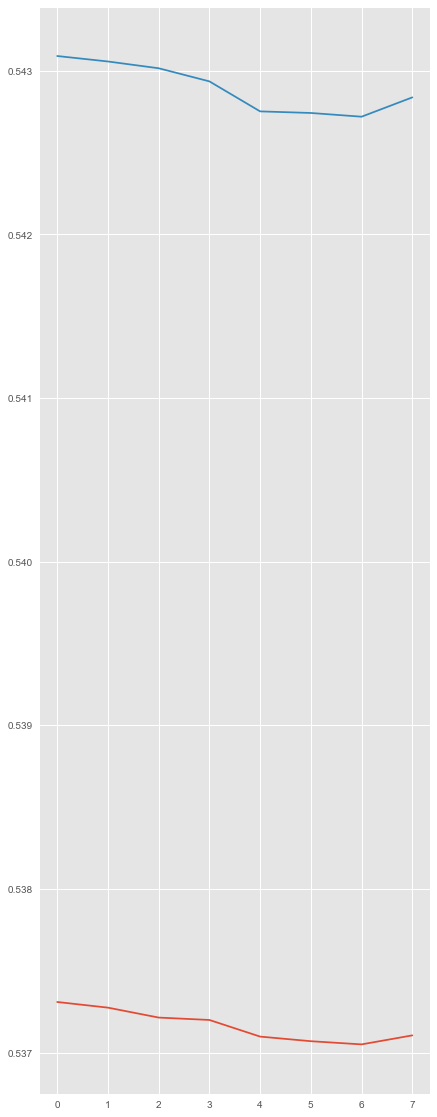

In [257]:
a=[0.537105681395,
   0.537050638599,
   0.537070068173,
   0.537098245519,
   0.537199897152,
   0.537214504856,
   0.537275189857,
   0.537309757757]

b=[0.5428379,
0.5427199,
0.5427426,
0.5427524,
0.5429358,
0.5430159,
0.5430573,
0.5430907]
plt.figure(figsize=(7,20))
plt.plot(a[::-1])
plt.plot(b[::-1])

In [277]:
0.537050638599- 0.5427199

-0.005669261400999992

In [278]:
0.537333358032- 0.5427199

-0.005386541968000036